In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

ModuleNotFoundError: No module named 'numpy'

In [2]:
actions = [
    'pet',
    'heart',
    'feed'
]

data = np.concatenate([
    np.load('dataset/seq_pet_1642868937.npy'),
    np.load('dataset/seq_heart_1642868937.npy'),
    np.load('dataset/seq_feed_1642868937.npy')
], axis=0)

data.shape

(1769, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(1769, 30, 99)
(1769,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(1769, 3)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1592, 30, 99) (1592, 3)
(177, 30, 99) (177, 3)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model2_1.0.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
50/50 [==============================] - ETA: 0s - loss: 23.3107 - acc: 0.6049
Epoch 00001: val_acc improved from -inf to 0.64407, saving model to models\model2_1.0.h5
50/50 [==============================] - 1s 17ms/step - loss: 23.3107 - acc: 0.6049 - val_loss: 35.0563 - val_acc: 0.6441
Epoch 2/200
46/50 [==========================>...] - ETA: 0s - loss: 223.6237 - acc: 0.4694
Epoch 00002: val_acc did not improve from 0.64407
50/50 [==============================] - 1s 11ms/step - loss: 224.7347 - acc: 0.4661 - val_loss: 178.5659 - val_acc: 0.3955
Epoch 3/200
50/50 [==============================] - ETA: 0s - loss: 48.9431 - acc: 0.6055
Epoch 00003: val_acc improved from 0.64407 to 0.81921, saving model to models\model2_1.0.h5
50/50 [==============================] - 1s 11ms/step - loss: 48.9431 - acc: 0.6055 - val_loss: 8.4090 - val_acc: 0.8192
Epoch 4/200
47/50 [===========================>..] - ETA: 0s - loss: 14.2325 - acc: 0.7739
Epoch 00004: val_acc did not improve 

50/50 [==============================] - 1s 12ms/step - loss: 0.4225 - acc: 0.9253 - val_loss: 0.7055 - val_acc: 0.9040
Epoch 32/200
46/50 [==========================>...] - ETA: 0s - loss: 0.4543 - acc: 0.9192
Epoch 00032: val_acc improved from 0.90395 to 0.90960, saving model to models\model2_1.0.h5
50/50 [==============================] - 1s 12ms/step - loss: 0.4365 - acc: 0.9221 - val_loss: 0.6963 - val_acc: 0.9096
Epoch 33/200
46/50 [==========================>...] - ETA: 0s - loss: 0.4060 - acc: 0.9293
Epoch 00033: val_acc did not improve from 0.90960
50/50 [==============================] - 1s 11ms/step - loss: 0.3867 - acc: 0.9309 - val_loss: 0.6610 - val_acc: 0.8927
Epoch 34/200
46/50 [==========================>...] - ETA: 0s - loss: 0.3995 - acc: 0.9260
Epoch 00034: val_acc did not improve from 0.90960
50/50 [==============================] - 1s 11ms/step - loss: 0.4015 - acc: 0.9253 - val_loss: 0.6745 - val_acc: 0.9096
Epoch 35/200
46/50 [==========================>...] - E

Epoch 62/200
49/50 [============================>.] - ETA: 0s - loss: 0.1800 - acc: 0.9662
Epoch 00062: val_acc did not improve from 0.96045
50/50 [==============================] - 1s 12ms/step - loss: 0.1774 - acc: 0.9667 - val_loss: 1.1836 - val_acc: 0.9322
Epoch 63/200
46/50 [==========================>...] - ETA: 0s - loss: 0.1833 - acc: 0.9640
Epoch 00063: val_acc did not improve from 0.96045
50/50 [==============================] - 1s 12ms/step - loss: 0.1770 - acc: 0.9648 - val_loss: 1.1963 - val_acc: 0.9266
Epoch 64/200
46/50 [==========================>...] - ETA: 0s - loss: 0.1713 - acc: 0.9688
Epoch 00064: val_acc did not improve from 0.96045
50/50 [==============================] - 1s 12ms/step - loss: 0.1729 - acc: 0.9686 - val_loss: 1.1630 - val_acc: 0.9266
Epoch 65/200
50/50 [==============================] - ETA: 0s - loss: 0.1663 - acc: 0.9623
Epoch 00065: val_acc improved from 0.96045 to 0.96610, saving model to models\model2_1.0.h5
50/50 [===========================

Epoch 93/200
46/50 [==========================>...] - ETA: 0s - loss: 0.0144 - acc: 0.9952
Epoch 00093: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 12ms/step - loss: 0.0140 - acc: 0.9956 - val_loss: 0.0210 - val_acc: 0.9887
Epoch 94/200
48/50 [===========================>..] - ETA: 0s - loss: 0.0110 - acc: 0.9954
Epoch 00094: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 13ms/step - loss: 0.0112 - acc: 0.9950 - val_loss: 0.0200 - val_acc: 0.9887
Epoch 95/200
46/50 [==========================>...] - ETA: 0s - loss: 0.0103 - acc: 0.9952
Epoch 00095: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 12ms/step - loss: 0.0104 - acc: 0.9956 - val_loss: 0.0267 - val_acc: 0.9887
Epoch 96/200
50/50 [==============================] - ETA: 0s - loss: 0.0113 - acc: 0.9962
Epoch 00096: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 13ms/step - loss: 0.0113 - acc: 

46/50 [==========================>...] - ETA: 0s - loss: 0.0871 - acc: 0.9735
Epoch 00155: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 12ms/step - loss: 0.0921 - acc: 0.9730 - val_loss: 0.2448 - val_acc: 0.9492
Epoch 156/200
46/50 [==========================>...] - ETA: 0s - loss: 0.0878 - acc: 0.9728
Epoch 00156: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 12ms/step - loss: 0.0827 - acc: 0.9736 - val_loss: 0.2129 - val_acc: 0.9605
Epoch 157/200
46/50 [==========================>...] - ETA: 0s - loss: 0.1084 - acc: 0.9667
Epoch 00157: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 12ms/step - loss: 0.1043 - acc: 0.9673 - val_loss: 0.2417 - val_acc: 0.9605
Epoch 158/200
46/50 [==========================>...] - ETA: 0s - loss: 0.0887 - acc: 0.9755
Epoch 00158: val_acc did not improve from 0.99435
50/50 [==============================] - 1s 12ms/step - loss: 0.0880 - acc: 0.9761 - v

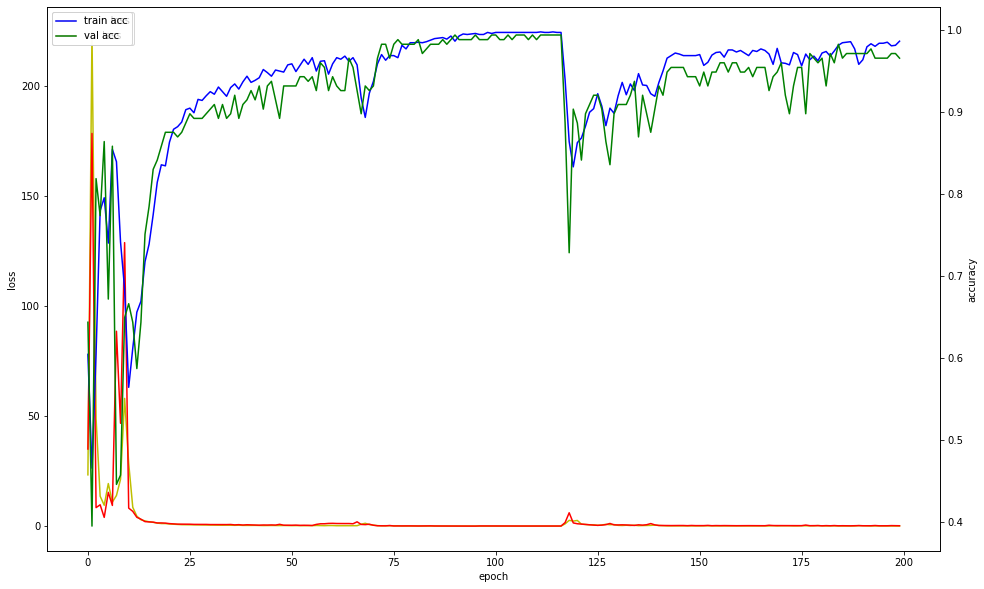

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model2_1.0.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[122,   0],
        [  0,  55]],

       [[108,   1],
        [  0,  68]],

       [[123,   0],
        [  1,  53]]], dtype=int64)